# Lake Model Demo

The lake model is a basic tool for modeling unemployment

It is a tool for analyzing

* flows between unemployment and employment

* and how they influence steady state employment and unemployment rates

In [1]:
%matplotlib inline
%run ./lake-model-demo.py

## Initialize the Parameters of the Model

The economy is inhabited by a very large number of ex-ante identical workers.

The workers

* live forever

* spend their lives moving between unemployment and employment

Their rates of  transition between being unemployed and employed are  governed by the following parameters:

* $\lambda$: The job finding rate for currently unemployed workers

* $\alpha$: The dismissal rate for currently employed workers

* $b$: Entry rate into the labor force

* $d$: Exit rate from the labor force

The growth rate of the labor force evidently equals $g=b-d$

In [2]:
alpha = 0.013 #Dismissal Rate
lamb = 0.2486 #Job Finding Rate
b = 0.0124 #Entry Rate from the Labor Force
d = 0.00822 #Exit Rate from the Labor Force
g = b-d #Growth Rate of the Labor Force

Aggregates
----------

We want  the dynamics of the following aggregates

* $E_t$: The total number of employed workers at date $t$

* $U_t$: The total number of unemployed workers at date $t$

* $N_t$: The number of workers in the labor force at date $t$

We also want to know the values of the following objects

* $e_t$: The employment rate ($E_t/N_t$) at date $t$

* $u_t$: The unemployment rate ($U_t/N_t$) at date $t$

## Initial Conditions and Time Periods

In [3]:
N0 = 150.
e0 = 0.92
u0 = 1-e0
T = 50

## Solving the Model

Laws of Motion for  Stock Variables
------------------------------------

We begin by constructing laws of motion for the aggregate variables: $E_t,U_t,\text{ and }N_t$

Of the mass of workers $E_t$ who are employed at date $t$, 

* $(1-d)E_t$ will remain in the labor force

* of these, $(1-\alpha)(1-d)E_t$ will remain employed

Of the mass of workers $U_t$ workers who are currently unemployed, 

* $(1-d)U_t$ will remain in the labor force

* of these, $\lambda(1-d)U_t$ will become employed

Therefore,  the number of workers who will be employed at date $t+1$ will be

$$
	E_{t+1} = (1-d)(1-\alpha)E_t + (1-d)\lambda U_t
$$

A similar analysis implies

$$
	U_{t+1} = (1-d)\alpha E_t + (1-d)(1-\lambda)U_t + b (E_t+U_t)
$$

$b(E_t+U_t)$ is the mass of new workers entering the labor force unemployed

The total stock of workers $N_t=E_t+U_t$ evolves as

$$
	N_{t+1} = (1+b-d)N_t = (1+g)N_t
$$

Letting $X_t = \left(\begin{matrix}E_t\\U_t\end{matrix}\right)$, the law of motion for $X$  is

$$
     X_{t+1} = A X_t
$$

where 

$$
	A := 
    \begin{pmatrix}
        (1-d)(1-\alpha) & (1-d)\lambda\\ 
        (1-d)\alpha + b & (1-d)(1-\lambda) + b  
    \end{pmatrix}
$$

Laws of Motion for Rates of Employment and Unemployment
--------------------------------------------------------

The following describes the laws of motion for the employment and unemployment rates. 

$$
    \begin{pmatrix}
        E_{t+1}/N_{t+1} \\ 
        U_{t+1}/N_{t+1}
    \end{pmatrix}
	= 
    \frac1{1+g}
    \begin{pmatrix}
        (1-d)(1-\alpha) & (1-d)\lambda
        \\ 
        (1-d)\alpha + b & (1-d)(1-\lambda) + b 
    \end{pmatrix}
    \begin{pmatrix}
        E_{t}/N_{t}
        \\ 
        U_{t}/N_{t}
    \end{pmatrix}
$$

Letting 

$$
    x_t := 
    \left(\begin{matrix}
        e_t\\ u_t
    \end{matrix}\right) 
    = \left(\begin{matrix}
        E_t/N_t\\ U_t/N_t
    \end{matrix}\right)
$$

we can also write this as 

$$
    x_{t+1} = \hat A x_t
    \quad \text{where} \quad
    \hat A := \frac{1}{1 + g} A
$$


Evidently, $e_t + u_t = 1$ implies that $e_{t+1}+u_{t+1} = 1$

Steady States
--------------------

The aggregates $E_t$ and $U_t$ won't converge to steady states because  their sum $E_t +U_t$ grows at gross rate $1+g$

But the vector of employment and unemployment rates $x_t$ can be in a steady state
$\bar x$ provided that we can find a solution to the matrix equation

$$
	\bar x = \hat A \bar x
$$

where the components satisfy $\bar e + \bar u = 1$  (that is, $e_t + u_t = 1$ is preserved in steady state)

This equation tells us that a steady state level $\bar x$ is an  eigenvector of $\hat A$ associated with a unit eigenvalue


We also have $x_t \to \bar x$ as $t \to \infty$ provided that the remaining eigenvalues of $\hat A$ are in modulus less that 1

In [4]:
#-Construct the Lake Model-#
LM = LakeModel(lamb,alpha,b,d)
#Find the steady state #
xbar = LM.find_steady_state()
print('Steady State: Employment: %s, Unemployment: %s' % (xbar[0],xbar[1]))

Steady State: Employment: 0.906956575522, Unemployment: 0.0930434244778


In [5]:
# What is LM.find_steady_state returning?
LM.find_steady_state() # Shift+Tab

array([ 0.90695658,  0.09304342])

In [6]:
#Simulate stocks for T periods
E0 = e0*N0
U0 = u0*N0
X_path = np.vstack(LM.simulate_stock_path([E0,U0],T) )

## Generate Plot of Stock Variables 

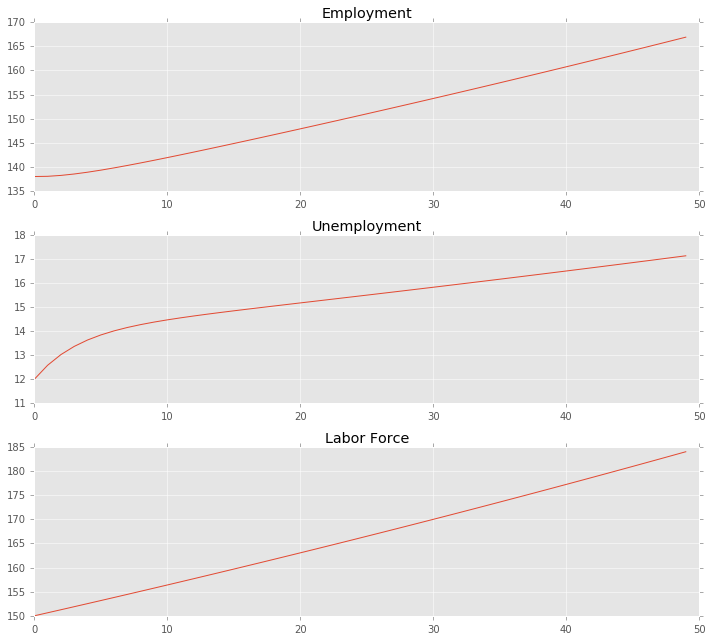

In [7]:
plt.figure(figsize=[10,9])
plt.subplot(3,1,1)
plt.plot(X_path[:,0])
plt.title(r'Employment')
plt.subplot(3,1,2)
plt.plot(X_path[:,1])
plt.title(r'Unemployment')
plt.subplot(3,1,3)
plt.plot(X_path.sum(1))
plt.title(r'Labor Force')
plt.tight_layout()

## Simulate Employment and Unemployment Rates for T periods


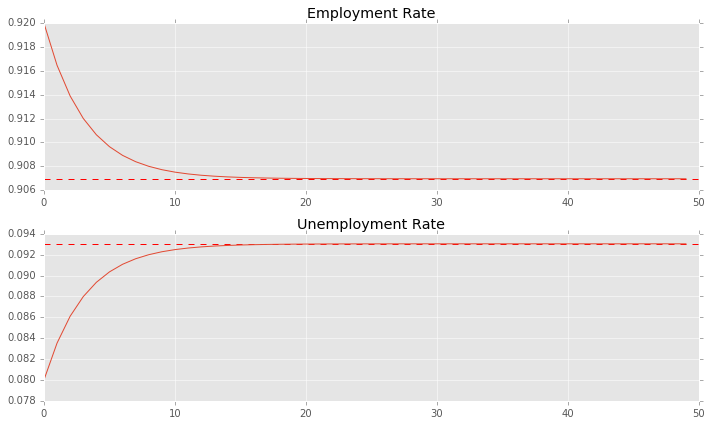

In [8]:
x_path = np.vstack( LM.simulate_rate_path([e0,u0],T) )
plt.figure(figsize=[10,6])
plt.subplot(2,1,1)
plt.plot(x_path[:,0])
plt.hlines(xbar[0],0,T,'r','--')
plt.title(r'Employment Rate')
plt.subplot(2,1,2)
plt.plot(x_path[:,1])
plt.hlines(xbar[1],0,T,'r','--')
plt.title(r'Unemployment Rate')
plt.tight_layout()

## Simulate a Single Agent

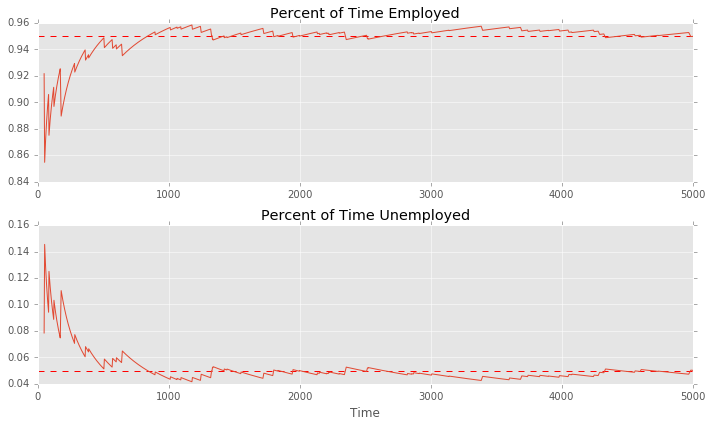

In [9]:
#Define Number of Time Periods
T = 5000

A = LakeModelAgent(lamb,alpha)
pi_bar = A.compute_ergodic().flatten()

sHist = np.hstack(A.simulate(1,T))

pi_u = np.cumsum(sHist)/(np.arange(T) + 1.) # time spent in unemployment after T periods
pi_e = 1- pi_u #time spent employed

plt.figure(figsize=[10,6])
plt.subplot(2,1,1)
plt.plot(range(50,T),pi_e[50:])
plt.hlines(pi_bar[0],0,T,'r','--')
plt.title('Percent of Time Employed')
plt.subplot(2,1,2)
plt.plot(range(50,T),pi_u[50:])
plt.hlines(pi_bar[1],0,T,'r','--')
plt.xlabel('Time')
plt.title('Percent of Time Unemployed')
plt.tight_layout()